<a href="https://colab.research.google.com/github/grahamriley2/ThinkfulDS/blob/main/Customer_Churn_Prediction_DS_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration & Visualization

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grahamriley2/customer_churn/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#check for nulls
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data doesn't appear to have any null values, but let's make sure there aren't any values that are just a blank space.

In [ ]:
#replace blank space with nan
df = df.replace(' ',np.nan)
#check for nulls again
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It turns out there were actually 11 blank spaces in the Total Charges column. Setting these equal to zero wouldn't make much sense, since no one pays zero dollars per month. I could also use some other method to find an appropriate value, such as the using the mean or median, but since 11 entries is so few I will simply drop these rows.

In [ ]:
#drop nulls
df = df.dropna()
#verify that only 11 rows were dropped
df.shape

(7032, 21)

The dataset looks good, but there is one oddity I observed. The TotalCharges Feature is of type "object" despite appearing to be numerical. I'll convert that to type "float64."

In [ ]:
#convert Total Charges to numeric
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors = 'coerce')
#confirm new datatype
df['TotalCharges'].dtype

dtype('float64')

Now the TotalCharges Feature comes through as type "float64" as expected.

I'm also going to convert the SeniorCitizen Feature to an "object" because it is a Boolean Classifier, and I don't want it to get mixed in with the Features that are actually continuous such as Tenure, MonthlyCharges and TotalCharges.

Later I will apply onehotencoding to convert all of these categorical features into boolean arrays.

In [ ]:
#convert Senior Citizen to string
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
#confirm new datatype
df['SeniorCitizen'].dtype

dtype('O')

**Categorical Feature Exploration**

First I explore the demographic characteristics of the customer base.

In [ ]:
#Create list of categorical column names
object_cols = df.select_dtypes('object').columns
object_cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [ ]:
#Create a dictionary with the classes and value counts for each class
dict_counts = {}
for col in object_cols:
  classes = (col + '_classes')
  counts = (col + '_counts')
  dict_counts[classes] = df[col].value_counts().index
  dict_counts[counts] = df[col].value_counts().values

<function matplotlib.pyplot.show(*args, **kw)>

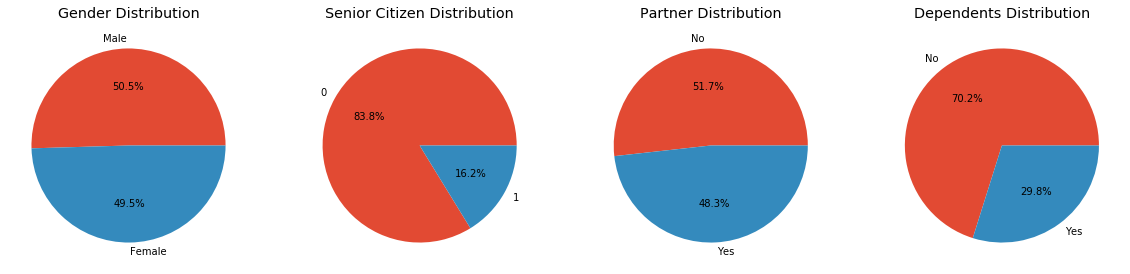

In [ ]:
#Create a pie plot that shows the percentage of customers that belong to each class
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20,10]

plt.subplot(1,4,1)
plt.title('Gender Distribution')
plt.pie(dict_counts['gender_counts'],autopct='%1.1f%%',labels=dict_counts['gender_classes'])

plt.subplot(1,4,2)
plt.title('Senior Citizen Distribution')
plt.pie(dict_counts['SeniorCitizen_counts'],autopct='%1.1f%%',labels=dict_counts['SeniorCitizen_classes'])

plt.subplot(1,4,3)
plt.title('Partner Distribution')
plt.pie(dict_counts['Partner_counts'],autopct='%1.1f%%',labels=dict_counts['Partner_classes'])

plt.subplot(1,4,4)
plt.title('Dependents Distribution')
plt.pie(dict_counts['Dependents_counts'],autopct='%1.1f%%',labels=dict_counts['Dependents_classes'])

plt.show

Here we get an idea of what the customer base looks like. It is roughly a 50/50 split between male and female, and roughly half of the customers live with a partner. Senior citizens make up about 16% of the customer base, while 70% of customers reports having no Dependents.

Next I explore some of the characteristics of the services used by the customers.

<function matplotlib.pyplot.show(*args, **kw)>

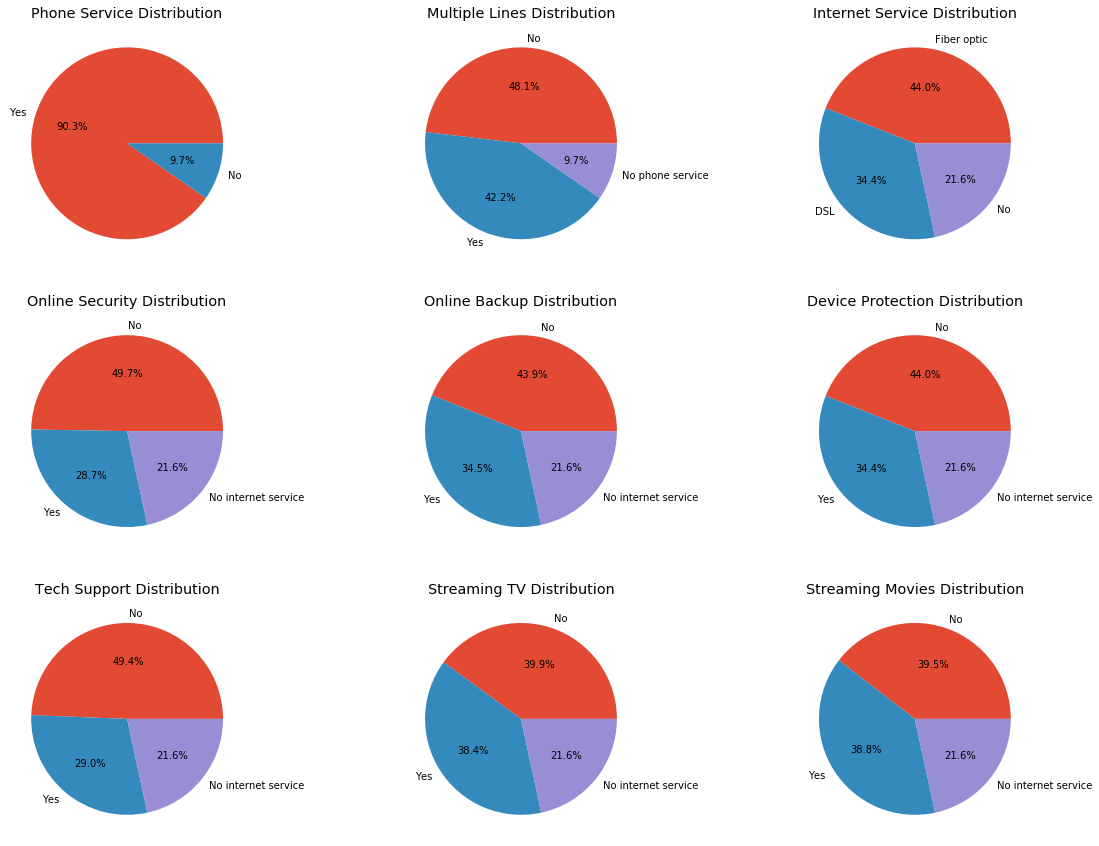

In [ ]:
plt.rcParams['figure.figsize'] = [20,15]

plt.subplot(3,3,1)
plt.title('Phone Service Distribution')
plt.pie(dict_counts['PhoneService_counts'],autopct='%1.1f%%',labels=dict_counts['PhoneService_classes'])

plt.subplot(3,3,2)
plt.title('Multiple Lines Distribution')
plt.pie(dict_counts['MultipleLines_counts'],autopct='%1.1f%%',labels=dict_counts['MultipleLines_classes'])

plt.subplot(3,3,3)
plt.title('Internet Service Distribution')
plt.pie(dict_counts['InternetService_counts'],autopct='%1.1f%%',labels=dict_counts['InternetService_classes'])

plt.subplot(3,3,4)
plt.title('Online Security Distribution')
plt.pie(dict_counts['OnlineSecurity_counts'],autopct='%1.1f%%',labels=dict_counts['OnlineSecurity_classes'])

plt.subplot(3,3,5)
plt.title('Online Backup Distribution')
plt.pie(dict_counts['OnlineBackup_counts'],autopct='%1.1f%%',labels=dict_counts['OnlineBackup_classes'])

plt.subplot(3,3,6)
plt.title('Device Protection Distribution')
plt.pie(dict_counts['DeviceProtection_counts'],autopct='%1.1f%%',labels=dict_counts['DeviceProtection_classes'])

plt.subplot(3,3,7)
plt.title('Tech Support Distribution')
plt.pie(dict_counts['TechSupport_counts'],autopct='%1.1f%%',labels=dict_counts['TechSupport_classes'])

plt.subplot(3,3,8)
plt.title('Streaming TV Distribution')
plt.pie(dict_counts['StreamingTV_counts'],autopct='%1.1f%%',labels=dict_counts['StreamingTV_classes'])

plt.subplot(3,3,9)
plt.title('Streaming Movies Distribution')
plt.pie(dict_counts['StreamingMovies_counts'],autopct='%1.1f%%',labels=dict_counts['StreamingMovies_classes'])


plt.show

Next I explore the account and billing information of the customers.

<function matplotlib.pyplot.show(*args, **kw)>

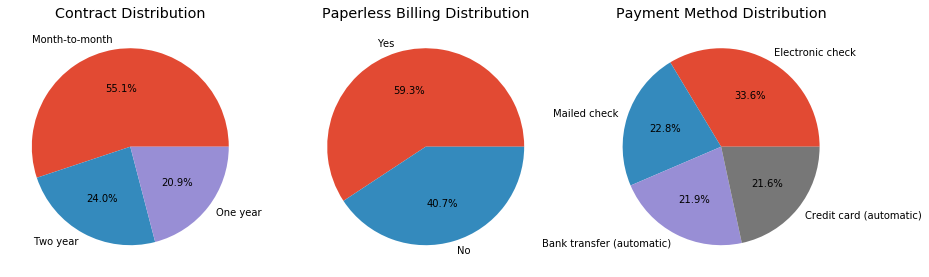

In [ ]:
plt.rcParams['figure.figsize'] = [15,15]

plt.subplot(1,3,1)
plt.title('Contract Distribution')
plt.pie(dict_counts['Contract_counts'],autopct='%1.1f%%',labels=dict_counts['Contract_classes'])

plt.subplot(1,3,2)
plt.title('Paperless Billing Distribution')
plt.pie(dict_counts['PaperlessBilling_counts'],autopct='%1.1f%%',labels=dict_counts['PaperlessBilling_classes'])

plt.subplot(1,3,3)
plt.title('Payment Method Distribution')
plt.pie(dict_counts['PaymentMethod_counts'],autopct='%1.1f%%',labels=dict_counts['PaymentMethod_classes'])

plt.show

[Some observations on the above feature distributions]

Lastly, and most importantly, I look at the distribution of the Target: Churn

<function matplotlib.pyplot.show(*args, **kw)>

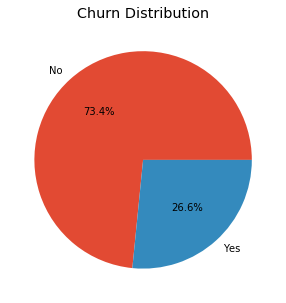

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Churn Distribution')
plt.pie(dict_counts['Churn_counts'],autopct='%1.1f%%',labels=dict_counts['Churn_classes'])

plt.show

**Continuous Feature Exploration**

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

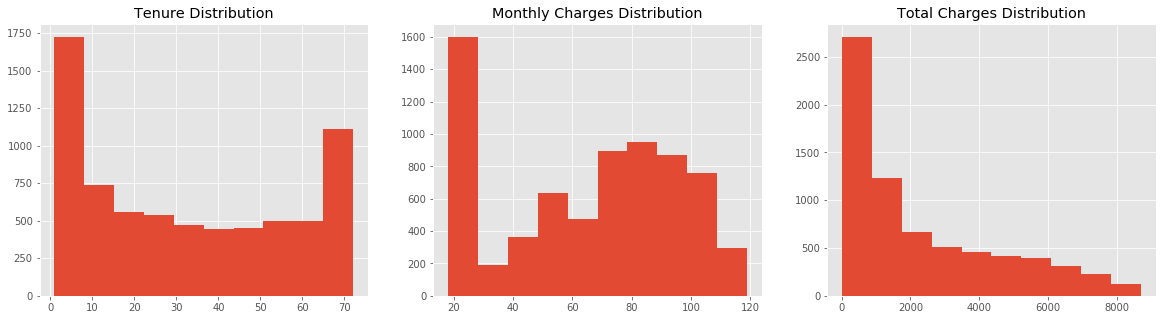

In [ ]:
plt.rcParams['figure.figsize'] = [20,5]

#plot histogram for each continuous feature
plt.subplot(1,3,1)
plt.title('Tenure Distribution')
plt.hist(df['tenure'])

plt.subplot(1,3,2)
plt.title('Monthly Charges Distribution')
plt.hist(df['MonthlyCharges'])

plt.subplot(1,3,3)
plt.title('Total Charges Distribution')
plt.hist(df['TotalCharges'])

All the continuous features are skewed left.

The Tenure distribution shows that there are a lot of relatively new customers, as well as a lot of customers that have been customers for over 65 years. Considering the maximum tenure is 72 years, these are primarily customers that have been with the Telecom company since its inception.

The Monthly Charges feature has an interesting distribution. There are a ton of customers who pay less than 30 dollars per month. If these customers were removed, the data would be close to Normally distributed centered around roughly 80 dollars per month.

This can probably be explained by the services used by each customer. Customers that have no internet service probably pay much less than customers with internet service. Let's check it out.


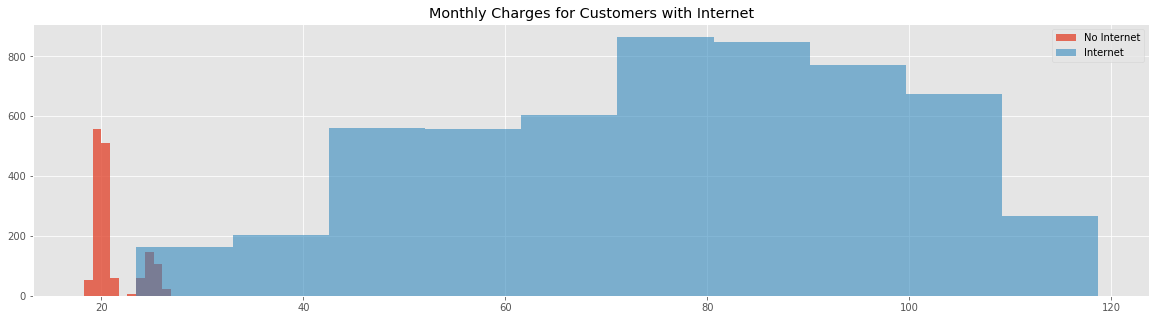

In [ ]:
plt.rcParams['figure.figsize'] = [20,5]

#Create separate dataframes for customers that have internet service and customers that do not
df_no_internet = df.loc[(df['InternetService']=='No')]
df_internet = df.loc[(df['InternetService']!='No')]

#Plot the distributions of each of these group's monthly charges on the same histogram
plt.title('Monthly Charges for Customers with No Internet')
plt.hist(df_no_internet['MonthlyCharges'], alpha = .8,label = 'No Internet')

plt.title('Monthly Charges for Customers with Internet')
plt.hist(df_internet['MonthlyCharges'], alpha = .6,label = 'Internet')

plt.legend()

This shows that the cluster of customers who pay less than 30 dollars per month are primarily customers with no internet service.

# Create Feature and Target subsets

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

#Apply one hot encoding to the categorical features in the Feature dataframe
df_dummies = pd.get_dummies(df,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn'],drop_first=True)

#Create a Series for the Target
y = df_dummies['Churn_Yes']

#Create a dataframe for Features by dropping the Target and the unique identifier column
X = df_dummies.drop(['Churn_Yes','customerID'],axis=1)

#Examine the correlation coefficients between the Features
df_dummies.corr()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,1.000000,0.246862,0.825880,0.005285,0.015683,0.381912,0.163386,0.007877,-0.007877,0.332399,...,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,-0.013779,0.219874,0.097825,-0.112343,0.248033,-0.248033,0.490912,...,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.825880,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.113008,-0.113008,0.469042,...,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,0.005285,-0.013779,0.000048,1.000000,-0.001819,-0.001379,0.010349,-0.007515,0.007515,-0.008883,...,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
SeniorCitizen_1,0.015683,0.219874,0.102411,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.008392,0.142996,...,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
Partner_Yes,0.381912,0.097825,0.319072,-0.001379,0.016957,1.000000,0.452269,0.018397,-0.018397,0.142561,...,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,0.163386,-0.112343,0.064653,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.001078,-0.024307,...,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.007877,0.248033,0.113008,-0.007515,0.008392,0.018397,-0.001078,1.000000,-1.000000,0.279530,...,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.007877,-0.248033,-0.113008,0.007515,-0.008392,-0.018397,0.001078,-1.000000,1.000000,-0.279530,...,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.332399,0.490912,0.469042,-0.008883,0.142996,0.142561,-0.024307,0.279530,-0.279530,1.000000,...,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


# Apply SelectKBest to reduce the number of Features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#check current shape of the Feature dataframe
X.shape

(7032, 30)

In [ ]:
#keep the best 15 Features, drop the rest
X_15 = SelectKBest(chi2, k=15).fit_transform(X,y)

#confirm the new shape of the Feature dataframe
X_15.shape

(7032, 15)

# Split the Data into Train and Test sets

In [ ]:
#Split the data into train and test sets, keeping 30% of the records in the test set
X_train,X_test,y_train,y_test = train_test_split(X_15,y,test_size=.3)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix
import itertools

#Create function to get cv score for each model
def get_cv_score(model):
    cv_scores = cross_val_score(model, X_15, y, cv=5)
    print(f'Cross Validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')

#Create function to plot a confusion matrix for each model
plt.style.use('default')

def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Run a Dummy Classifier to establish a baseline accuracy score

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dummy.score(X_test,y_test)

0.7421800947867299

Confusion matrix, without normalization


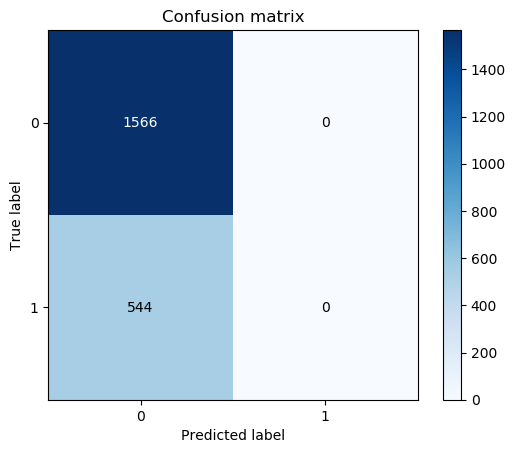

In [ ]:
#Calculate the dummy predictions and print a confusion matrix
y_pred = dummy.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred,)
print(classif_report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1566
           1       0.00      0.00      0.00       544

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.55      0.74      0.63      2110



/Users/grahamriley/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nearly 75% of the target is Negative, so I expect each of my models to outperform this Dummy Classifier and have an accuracy score greater than 75%

# Run a Decision Tree model using Grid Search Cross Validation to tune the hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'max_depth': [2,5,10,20,None],
    'splitter': ['best','random'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,5,10],
    'max_features': [2,5,10,15,None]    
}

#create the GridSearchCV optimizer for the Decision Tree Classifier
clf = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

#fit to the data
clf.fit(X_15,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:28.69597315788269 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer for the Decision Tree Classifier
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'random'}
Best Score: 0.7955052010825774


In [ ]:
start_time = time.time()

#Run the Decision Tree Classifier using the optimal parameters and fit to the data
dec_tree = DecisionTreeClassifier(max_depth = 10, max_features = 15, min_samples_leaf = 10, min_samples_split = 5, splitter = 'random')
dec_tree.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(dec_tree)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.79459844 0.79033404 0.77667141 0.79800853 0.79943101]
Mean CV Score: 0.791808686702638
runtime:0.20396184921264648 seconds


Confusion matrix, without normalization


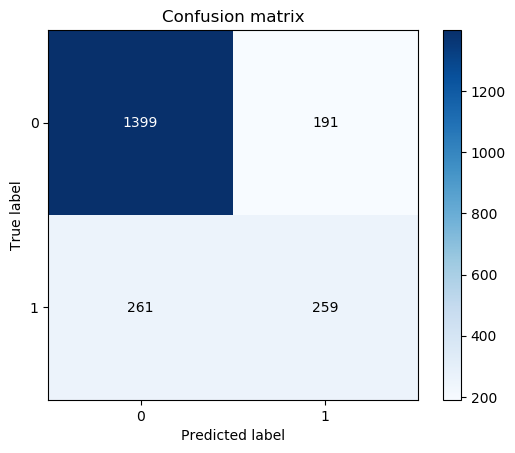

In [ ]:
#Calculate the Decision Tree predictions and print a confusion matrix
y_pred = dec_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred,)
print(classif_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1590
           1       0.58      0.50      0.53       520

    accuracy                           0.79      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



# Run a Random Forest Model using Grid Search Cross Validation to tune the hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'n_estimators': [100,500,1000],
    'max_depth': [None,5,10,20,100],
    'max_features': ['auto','log2',None]
}

#create the GridSearchCV optimizer for the Random Forest Classifier
clf = GridSearchCV(RandomForestClassifier(), params, cv=5)

#fit to the data
clf.fit(X_15,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:1784.2964489459991 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'max_depth': 5, 'max_features': None, 'n_estimators': 1000}
Best Score: 0.7964997204588721


In [ ]:
start_time = time.time()

#Run the Random Forest Classifier using the optimal parameters and fit to the data
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 5, max_features = None)
rf.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(rf)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.81094527 0.79673063 0.77809388 0.8029872  0.79302987]
Mean CV Score: 0.796357371848338
runtime:57.710777759552 seconds


Confusion matrix, without normalization


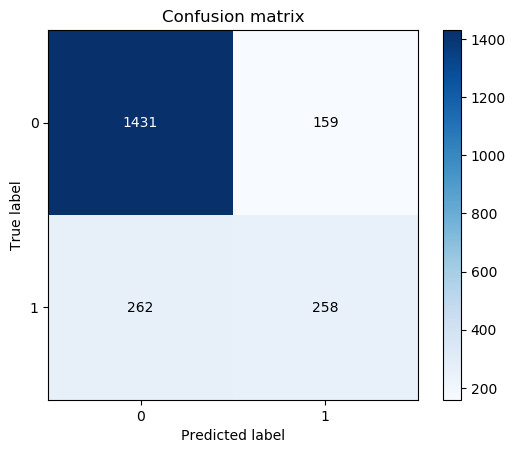

In [ ]:
#Calculate the Random Forest predictions and print a confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred,)
print(classif_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1590
           1       0.62      0.50      0.55       520

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



# Run a K-Nearest Neighbors Model using Grid Search Cross Validation to tune the hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'n_neighbors': np.arange(13,35,2),
    'p': [1,2]
}

#create the GridSearchCV optimizer for the K Nearest Neighbors Classifier
clf = GridSearchCV(KNeighborsClassifier(), params, cv=5)

#fit to the data
clf.fit(X_15,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:8.381685972213745 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'n_neighbors': 29, 'p': 1}
Best Score: 0.7862626513844109


In [ ]:
start_time = time.time()

#Run the K Nearest Neighbors classifier using the optimal parameters and fit to the data
knn = KNeighborsClassifier(n_neighbors = 29, p = 1)
knn.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(knn)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.78393746 0.78962331 0.78449502 0.7859175  0.78733997]
Mean CV Score: 0.7862626513844109
runtime:0.6386239528656006 seconds


Confusion matrix, without normalization


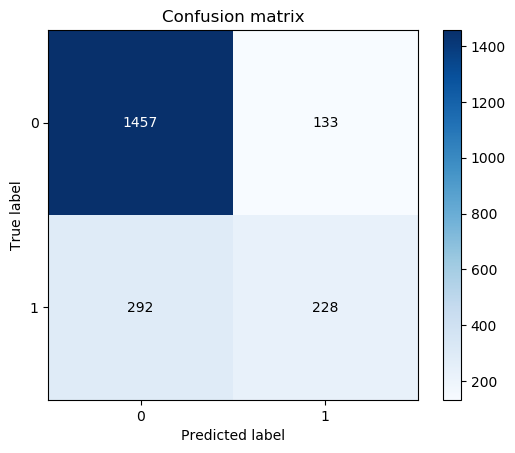

In [ ]:
#Calculate the K Nearest Neighbors predictions and print a confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1590
           1       0.63      0.44      0.52       520

    accuracy                           0.80      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.78      0.80      0.79      2110



# Run a Gradient Boosting Model using Grid Search Cross Validation to tune the hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'learning_rate': [.05,.1,.5],
    'n_estimators': [50,100,500],
    'max_depth': [None,3,10],
    'max_features': [None,'auto']
}

#create the GridSearchCV optimizer for the Gradient Boosting Classifier
clf = GridSearchCV(GradientBoostingClassifier(), params, cv=5)

#fit to the data
clf.fit(X_15,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:7756.434002399445 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 100}
Best Score: 0.7987752762301074


In [ ]:
start_time = time.time()

#Run the Gradient Boosting Classifier using the optimal parameters and fit to the data
boost = GradientBoostingClassifier(n_estimators = 100, learning_rate = .05, max_depth = 3, max_features = None)
boost.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(boost)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.81449893 0.79530917 0.78165007 0.80227596 0.80014225]
Mean CV Score: 0.7987752762301074
runtime:5.0031068325042725 seconds


Confusion matrix, without normalization


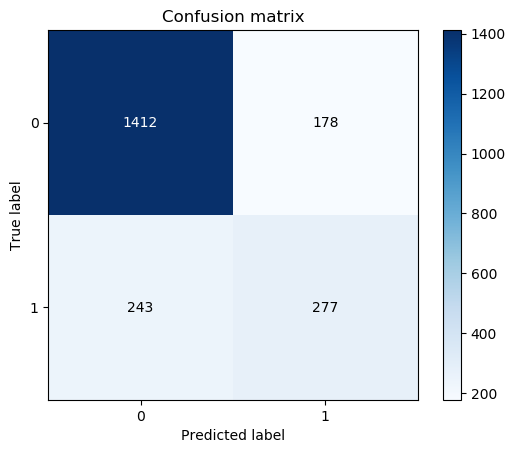

In [ ]:
#Calculate the gradient boosting predictions and print a confusion matrix
y_pred = boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1590
           1       0.61      0.53      0.57       520

    accuracy                           0.80      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.80      0.80      2110



# Run a Logistic Regression Model using GridSearchCV to tune the hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'C': [.1,.5,1,5]
}

#create the GridSearchCV optimizer for the Logistic Regression Model
clf = GridSearchCV(LogisticRegression(), params, cv=5)

#fit to the data
clf.fit(X_15,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:2.1787221431732178 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7987743663313184


In [ ]:
start_time = time.time()

#Run the Logistic Regression model using the optimal parameters and fit to the data
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = .1)
lr.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(lr)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.81236674 0.80383795 0.78378378 0.79871977 0.79516358]
Mean CV Score: 0.7987743663313184
runtime:0.3917539119720459 seconds


Confusion matrix, without normalization


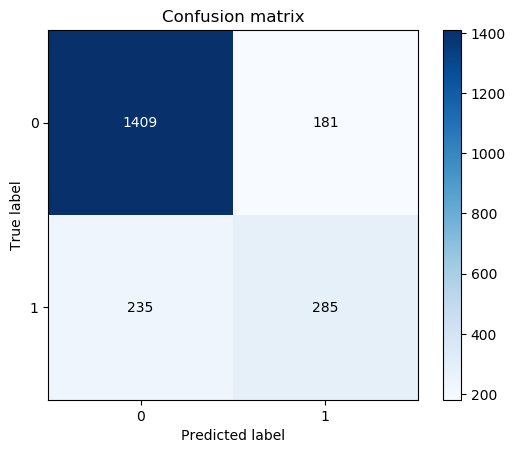

In [ ]:
#Calculate the Logistic Regression predictions and print a confusion matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1590
           1       0.61      0.55      0.58       520

    accuracy                           0.80      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.80      0.80      0.80      2110



# Apply Principal Component Analysis

Store the top two components in a new DataFrame and split the data using Train Test Split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#standardize the Features using StandardScaler
X_std = StandardScaler().fit_transform(X)

#set up pca
pca = PCA(n_components = 2)

#create principal components
principal_components = pca.fit_transform(X_std)

#create list of column names for the pca df
feat_cols = ['feature'+str(i) for i in range(2)]

#add components to a new dataframe
X_pca = pd.DataFrame(data = principal_components, columns = feat_cols)

X_pca.head()

,feature0,feature1
0,-0.427370,-3.153937
1,-0.200847,-0.796904
2,-0.157537,-2.092463
3,-0.893278,-0.882629
4,-0.609394,-3.172785


In [ ]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=.3)

# Run a Decision Tree Model using the top two Principal Components as the inputs

In [ ]:
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'max_depth': [2,5,10,20,None],
    'splitter': ['best','random'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,5,10],
    'max_features': [2,None]    
}

#create the GridSearchCV optimizer for the Decision Tree Classifier
clf = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

#fit to the data
clf.fit(X_pca,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:10.789298057556152 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer for the Decision Tree Classifier
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'random'}
Best Score: 0.781426741521007


In [ ]:
start_time = time.time()

#Run the Decision Tree Classifier using the optimal parameters and fit to the data
dec_tree = DecisionTreeClassifier(max_depth = 10, max_features = None, min_samples_leaf = 10, min_samples_split = 5, splitter = 'random')
dec_tree.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(dec_tree)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.7803838  0.79459844 0.7802276  0.7972973  0.79587482]
Mean CV Score: 0.7896763894407257
runtime:0.053787946701049805 seconds


Confusion matrix, without normalization


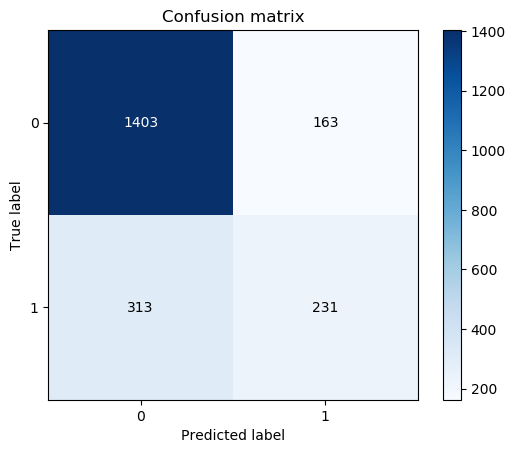

In [ ]:
#Calculate the Decision Tree predictions and print a confusion matrix
y_pred = dec_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1566
           1       0.59      0.42      0.49       544

    accuracy                           0.77      2110
   macro avg       0.70      0.66      0.67      2110
weighted avg       0.76      0.77      0.76      2110



# Run a Random Forest Model using the top two Principal Components as the inputs

In [ ]:
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'n_estimators': [100,500,1000],
    'max_depth': [None,5,10,20,100],
    'max_features': ['auto','log2',None]
}

#create the GridSearchCV optimizer for the Random Forest Classifier
clf = GridSearchCV(RandomForestClassifier(), params, cv=5)

#fit to the data
clf.fit(X_pca,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:28686.113961935043 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Best Score: 0.797353306622749


In [ ]:
start_time = time.time()

#Run the Random Forest Classifier using the optimal parameters and fit to the data
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = None)
rf.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(rf)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.80881308 0.7960199  0.77809388 0.80156472 0.79231863]
Mean CV Score: 0.7953620436731199
runtime:4.790100336074829 seconds


Confusion matrix, without normalization


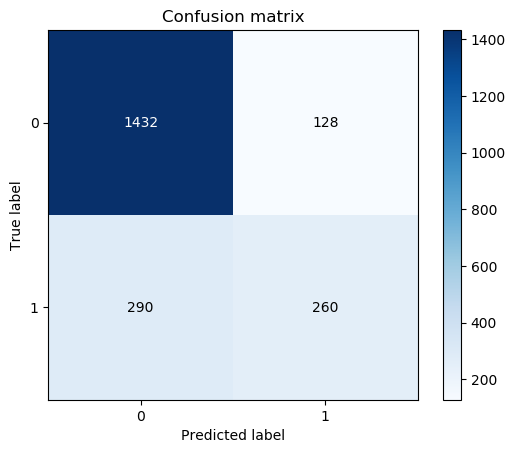

In [ ]:
#Calculate the Random Forest predictions and print a confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1560
           1       0.67      0.47      0.55       550

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



# Run a K-Nearest Neighbors Model using the top two Principal Components as the inputs

In [ ]:
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'n_neighbors': np.arange(13,35,2),
    'p': [1,2]
}

#create the GridSearchCV optimizer for the K Nearest Neighbors Classifier
clf = GridSearchCV(KNeighborsClassifier(), params, cv=5)

#fit to the data
clf.fit(X_pca,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:6.481943130493164 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'n_neighbors': 29, 'p': 2}
Best Score: 0.7750262101401143


In [ ]:
start_time = time.time()

#Run the K Nearest Neighbors classifier using the optimal parameters and fit to the data
knn = KNeighborsClassifier(n_neighbors = 29, p = 2)
knn.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(knn)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.77896233 0.78180526 0.77951636 0.78520626 0.78307255]
Mean CV Score: 0.7817125508405949
runtime:0.5996699333190918 seconds


Confusion matrix, without normalization


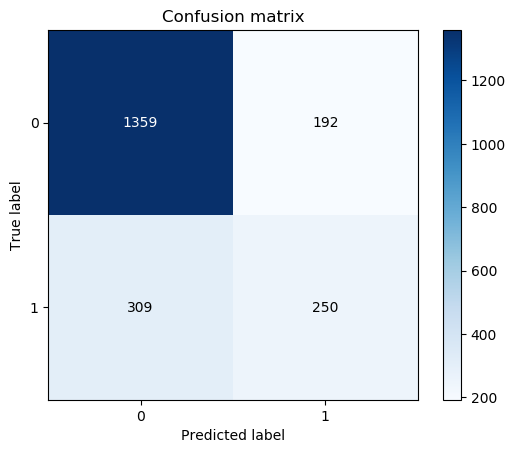

In [ ]:
#Calculate the K Nearest Neighbors predictions and print a confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1551
           1       0.57      0.45      0.50       559

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110



# Run a Gradient Boosting Model using the top two Principal Components as the inputs

In [ ]:
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'learning_rate': [.05,.1,.5],
    'n_estimators': [50,100,500],
    'max_depth': [None,3,10],
    'max_features': [None,'auto']
}

#create the GridSearchCV optimizer for the Gradient Boosting Classifier
clf = GridSearchCV(GradientBoostingClassifier(), params, cv=5)

#fit to the data
clf.fit(X_pca,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:2432.148115158081 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 50}
Best Score: 0.7835590387829194


In [ ]:
start_time = time.time()

#Run the Gradient Boosting Classifier using the optimal parameters and fit to the data
boost = GradientBoostingClassifier(n_estimators = 50, learning_rate = .05, max_depth = 3, max_features = None)
boost.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(boost)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.80454869 0.7981521  0.77951636 0.80440967 0.79871977]
Mean CV Score: 0.797069317100739
runtime:2.0715010166168213 seconds


Confusion matrix, without normalization


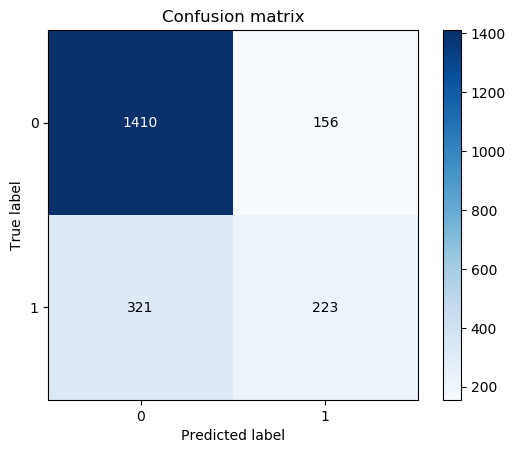

In [ ]:
#Calculate Gradient Boosting predictions and print a confusion matrix
y_pred = boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1566
           1       0.59      0.41      0.48       544

    accuracy                           0.77      2110
   macro avg       0.70      0.66      0.67      2110
weighted avg       0.76      0.77      0.76      2110



# Logistic Regression

In [ ]:
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'C': [.01,.1,.5,1]
}

#create the GridSearchCV optimizer for the Logistic Regression model
clf = GridSearchCV(LogisticRegression(), params, cv=5)

#fit to the data
clf.fit(X_pca,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:0.7427570819854736 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7703343675849567


In [ ]:
start_time = time.time()

#Run the Logistic Regression model using the optimal parameters and fit to the data
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01)
lr.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(lr)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.80597015 0.7960199  0.78307255 0.80725462 0.79445235]
Mean CV Score: 0.7973539132219415
runtime:0.22446012496948242 seconds


Confusion matrix, without normalization


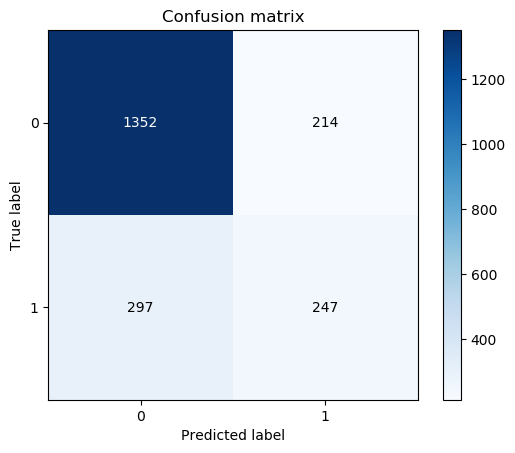

In [ ]:
#Calculate the Logistic Regression predictions and print a confusion matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1566
           1       0.54      0.45      0.49       544

    accuracy                           0.76      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
start_time = time.time()

#set the parameters to use in the GridSearchCV
params = {
    'kernel' : ['rbf', 'poly'],
    'C': [.1,.5,1],
    'gamma': [.1,.5,1]
}

#create the GridSearchCV optimizer for the SVM model
clf = GridSearchCV(SVC(), params, cv=5)

#fit to the data
clf.fit(X_pca,y)

print("runtime:%s seconds" % (time.time() - start_time))

runtime:1400.4596726894379 seconds


In [ ]:
#print the best parameters and score from the GridSearchCV optimizer
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.7797197713929843


In [ ]:
start_time = time.time()

#Run the SVC model using the optimal parameters and fit to the data
svc = SVC(kernel = 'rbf', gamma = 0.1, C = 0.1)
svc.fit(X_train,y_train)

#Get the cross_validation scores
get_cv_score(svc)

print("runtime:%s seconds" % (time.time() - start_time))

Cross Validation Scores: [0.74769012 0.74911158 0.75320057 0.75462304 0.76173542]
Mean CV Score: 0.7532721476947714
runtime:6.913969039916992 seconds


Confusion matrix, without normalization


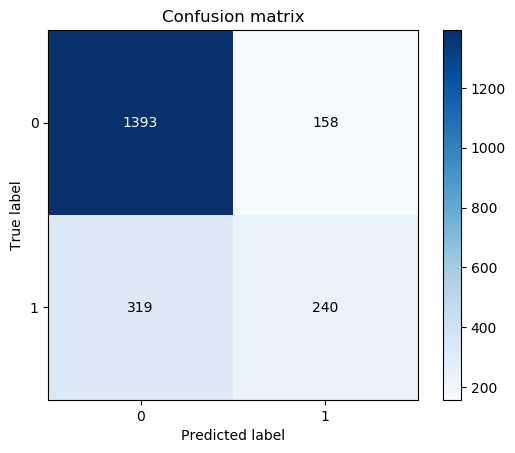

In [ ]:
#Calculate the Logistic Regression predictions and print a confusion matrix
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
#Print the classification report
classif_report = classification_report(y_test,y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1551
           1       0.60      0.43      0.50       559

    accuracy                           0.77      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.76      0.77      0.76      2110



# Analysis

In the above notebook, I implemented five classification models using the 15 "Best" Features as inputs, and six classification models using the top 2 Principal Components as inputs. Many of the models performed similarly in terms of predictive power, with an accuracy close to 80%, and an avg f1-score close to 0.70. The models varied significantly in runtime, however, showing that some would be more practical to apply in production. 

The strongest candidate to apply in the workplace is the Logistic Regression model using the 15 Best Features. This model's accuracy score of 79.88% was tied with Gradient Boosting for the highest of all models. Logistic Regression is also tied with Gradient Boosting for the highest weighted average f1-score: 0.80. The main difference between these two models is the runtime. The Logistic Regression model took just 2.2 seconds to run the GridSearchCV to tune the hyperparameters, and less than half a second to fit to the training set once the optimal hyperparameters were entered. Gradient Boosting on the other hand took nearly two hours to run the GridSearchCV, and 5 seconds to fit to the training set. Clearly, Logistic Regression is the model of choice in this case.

Interestingly, most models performed slightly worse in terms of predictive power using the top 2 Principal Components. While there was a slight drop in runtime due to this reduction in dimensionality, the drop in runtime was not great enough to make up for the poorer predictive performance. This dataset had some 7,000 records. In a dataset with significantly more records, reducing the dimensionality would be more worthwhile, even if it comes with a slight drop in predictive power, so I would be more likely to use the Principal Components rather than the 15 Best Features.

One interesting exercise would be to run the models again using the top *three* Principal Components to see if that brings about any significant increase in the predictive power.